# Enron Intent Detection - EDA & Viz.

In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Loading data as received

In [39]:
df_train=pd.read_csv("enron_train.txt",sep="\t",header=None)
df_test=pd.read_csv("enron_test.txt",sep="\t",header=None)

In [40]:
df_train.columns=["target_pred","email_content"]
df_test.columns=["target_pred","email_content"]

# Calculating string lengths & plotting a histogram

In [41]:
df_train['email_len'] = df_train['email_content'].str.len()

In [42]:
df_train['email_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='Email length',
    linecolor='black',
    yTitle='count',
    title='Email Content Text Length Distribution')

In [43]:
df_train['email_len'].loc[df_train['target_pred']=="Yes"].iplot(
    kind='hist',
    bins=100,
    xTitle='Email length',
    linecolor='black',
    yTitle='count',
    title='YES LABEL Email Content Text Length Distribution')

In [44]:
df_train['email_len'].loc[df_train['target_pred']=="No"].iplot(
    kind='hist',
    bins=100,
    xTitle='Email length',
    linecolor='black',
    yTitle='count',
    title='NO LABEL Email Content Text Length Distribution')

In [45]:
df_train['email_word_count'] = df_train['email_content'].apply(lambda x: len(re.findall(r'\w+',x)))

In [46]:
df_train['email_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Count',
    linecolor='black',
    yTitle='count',
    title='Email Content Word Count Distribution')

In [47]:
df_train['email_word_count'].loc[df_train['target_pred']=="Yes"].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Counts',
    linecolor='black',
    yTitle='count',
    title='YES LABEL Email Content Word Count Distribution')

In [48]:
df_train['email_word_count'].loc[df_train['target_pred']=="No"].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Counts',
    linecolor='black',
    yTitle='count',
    title='YES LABEL Email Content Word Count Distribution')

# Inference : After plotting charts for character lengths, and the word counts. It is seen that majority of the words lie between 10-14 only. However, for the "NO" label, the majority of text lengths lie between 80-100 characters, and for the "YES" label, they lie between 40-49 characters

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df_train['email_content'])
y = df_train['target_pred']

# Plotting a TSNE to check distribution of the text data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


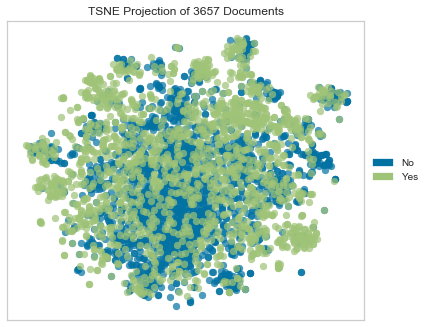

<Figure size 720x864 with 0 Axes>

In [50]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
plt.figure(figsize=(10,12))
tsne.show()

# Let's calculate the unique word counts in the trainset

In [51]:
def unique_word_counter(text):
    unique = len(set(re.findall(r'\w+',text)))
    return unique

In [52]:
df_train['unique_words'] = df_train['email_content'].apply(unique_word)

In [53]:
df_train['unique_words'].sum()

57453